# CHEOPS secondary eclipse modelling
## Case d: EV fixed to zero

**Author:** Hannu Parviainen<br>
**Last edited:** 26.5.2022

Here we model the *CHEOPS* data with a prior that forces the EV amplitude (practically to) zero, otherwise everything is like in the 2a notebook. We do this to test how much ignoring the EV would affect our results.

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from multiprocessing import Pool
from src import CHEOPSLPF

In [4]:
lpf = CHEOPSLPF('d')

In [5]:
def lnposterior(pv):
    return squeeze(lpf.lnposterior(pv))

pool = Pool(processes=20)

In [ ]:
lpf.ps

## Find the global posterior mode

Global optimisation:   0%|          | 0/150 [00:00<?, ?it/s]

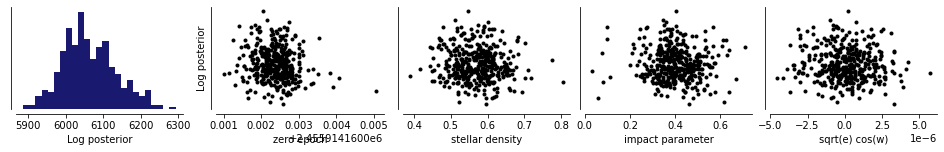

In [6]:
lpf.optimize_global(150, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

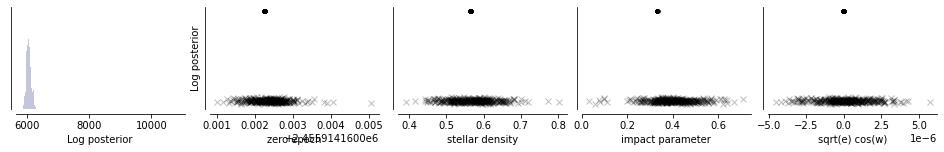

In [7]:
lpf.optimize_global(15000, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

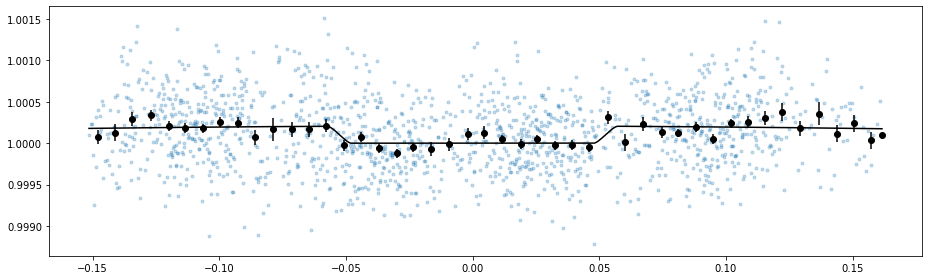

In [8]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [ ]:
lpf.sample_mcmc(5000, 100, repeats=10, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

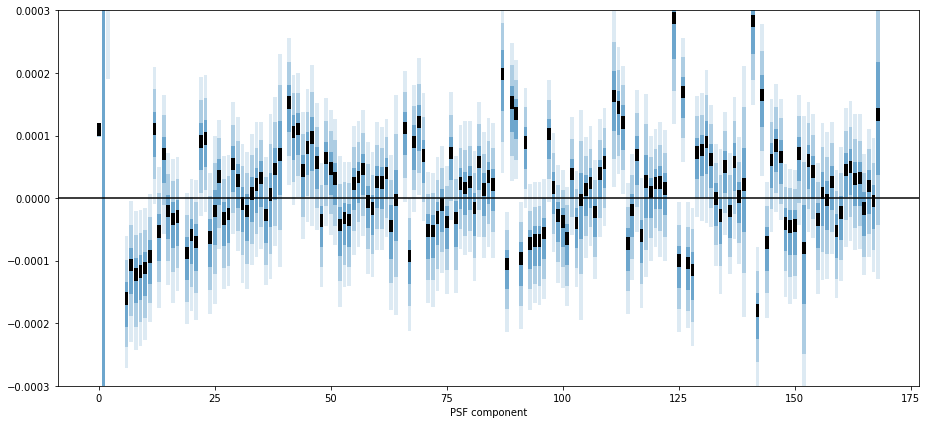

In [45]:
df = lpf.posterior_samples(derived_parameters=False)

fig, ax = subplots(figsize=(13,6))
bplot(df.iloc[:,10:])
ax.set_ylim(-0.0003, 0.0003)
setp(ax, xlabel='PSF component')
fig.tight_layout()

---

<center>&copy;2022 Hannu Parviainen</center>